### Size measurer

#### Segments the image to find shapes and measures their area (in pixels)

#### Step 1: Setting up, load the image

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [4]:
filepath = './pillbox/uneven1.jpg' #the . at the beginning is important
            # else imread later fails silently

In [5]:
img = cv2.imread(filepath)

In [7]:
img.shape #just checking that it loaded fine

(1944, 2592, 3)

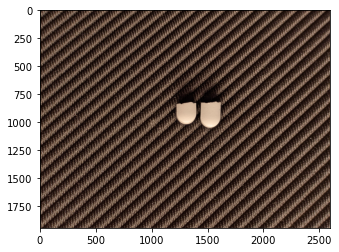

In [8]:
plt.imshow(img)

The above is an unfortunate background, but was sleepy and had to take the pill and go back to sleep. So just grabbed what was the only dark flat surface nearby for a quick photo. But would be interesting to segment this.

#### Step 2: Investigate image, Segment

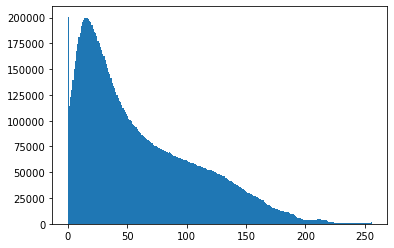

In [9]:
# let's see the image histogram to understand the intensity distribution
plt.hist(img.ravel(), 256, [0,256])
plt.show()

The above is a heavily left-skewed distribution. It isn't bimodal, so doesn't present a convenient breakpoint for thresholding. Mostly grays. There's a plateau after 200, that could be our pills. Let's investigate.

In [10]:
imggray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(imggray, 220, 255, cv2.THRESH_BINARY)

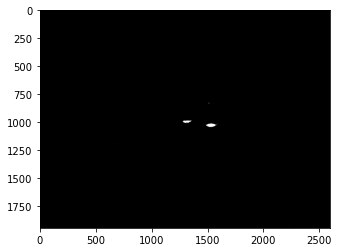

In [11]:
plt.imshow(thresh, 'gray')

Just the shiny bottoms of the pills. But at least the background has been completely removed. No diagonal lines as feared.

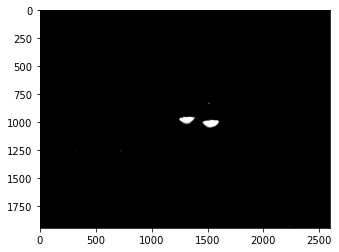

In [12]:
ret, thresh = cv2.threshold(imggray, 200, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, 'gray')

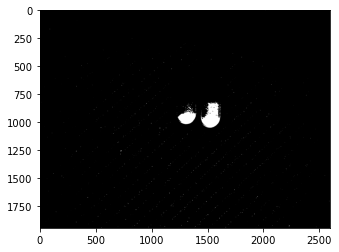

In [13]:
ret, thresh = cv2.threshold(imggray, 180, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, 'gray')

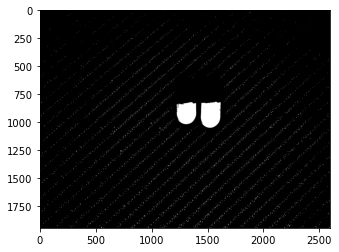

In [14]:
ret, thresh = cv2.threshold(imggray, 160, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, 'gray')

Almost there, need to be rid of the pinstripe suit. If there's no clean threshold, might need to use morphological operations, or just a tight crop.

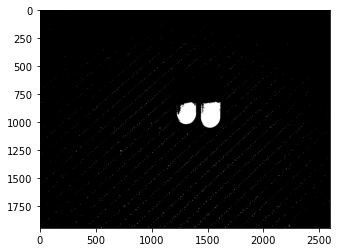

In [15]:
ret, thresh = cv2.threshold(imggray, 170, 255, cv2.THRESH_BINARY)
plt.imshow(thresh, 'gray')

Some bits of the pills are missing, and the pinstripe is still there, shows a clean binary threshold isn't possible. After trying more values, found that the above 160 is the first value where we can just see the full pills. Going ahead with that.